In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus

In [23]:
DATA_FILE = './Iris.csv'

In [24]:
iris_data = pd.read_csv(DATA_FILE)

In [25]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
FEAT_COLS = iris_data.columns.tolist()[1:-1]
FEAT_COLS

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

**note**
```python
iris_data.columns.tolist()
```

```python
Out[]:

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

```


In [27]:
CATEGRORY_LABEL_DICT = {
        'Iris-setosa':      0,  # 山鸢尾
        'Iris-versicolor':  1,  # 变色鸢尾
        'Iris-virginica':   2   # 维吉尼亚鸢尾
    }

In [28]:
iris_data['label'] = iris_data['Species'].apply(lambda x : CATEGRORY_LABEL_DICT[x])

In [39]:
X = iris_data[FEAT_COLS].values
y = iris_data['label'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [105]:
# model_list = []
max_depth_list = [2,3,4]
for d in max_depth_list:
    dt_model = DecisionTreeClassifier(max_depth=d)
    dt_model.fit(X_train, y_train)
#     model_list.append(dt_model)
    train_acc = dt_model.score(X_train, y_train)
    test_acc = dt_model.score(X_test, y_test)
    print('accuracy on Train set: {:.2f}%'.format(train_acc*100))
    print('accuracy on Test set: {:.2f}%'.format(test_acc*100))
    print()

accuracy on Train set: 97.00%
accuracy on Test set: 92.00%

accuracy on Train set: 98.00%
accuracy on Test set: 92.00%

accuracy on Train set: 100.00%
accuracy on Test set: 90.00%



# Tree visualization

In [96]:
dt_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
tmp_dot_file = 'decision_tree_tmp.dot'
export_graphviz(dt_model, out_file=tmp_dot_file, feature_names=FEAT_COLS, 
                class_names=list(CATEGRORY_LABEL_DICT.keys()), filled=True, impurity=False)

In [98]:
list(CATEGRORY_LABEL_DICT.keys())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [99]:
with open(tmp_dot_file) as f:
    dot_graph = f.read()

In [100]:
graph = pydotplus.graph_from_dot_data(dot_graph)

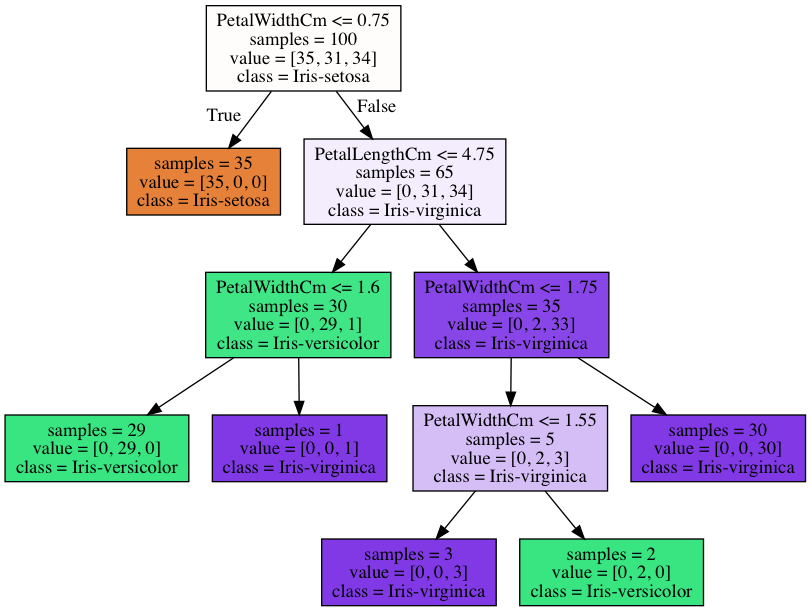

In [101]:
from IPython.display import Image

graph.write_png('decision_tree.png')
Image(graph.create_png())

<p style='color:red'>InvocationException: GraphViz's executables not found</p>

- Mac

```brew install graphviz```
- Windows

[GraphViz's executables not found - Windows #1](https://github.com/davidkorea/Titanic/issues/1)

# Feature Importance

In [102]:
dt_model.feature_importances_

array([0.        , 0.        , 0.40141195, 0.59858805])

In [103]:
FEAT_COLS

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

([<matplotlib.axis.YTick at 0x1160b7860>,
 <a list of 4 Text yticklabel objects>)

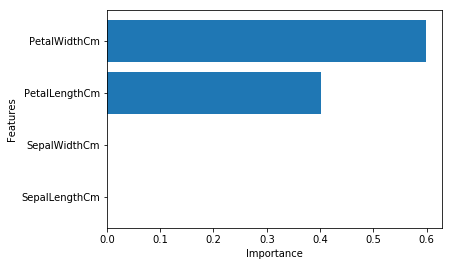

In [104]:
plt.figure()
plt.barh(range(len(FEAT_COLS)),dt_model.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.yticks(np.arange(len(FEAT_COLS)),FEAT_COLS)